In [1]:
%matplotlib inline

In [2]:
import sys
import os 
from glob import glob
import json

In [3]:
sys.path.insert(0, '../../')

In [4]:
import paleopy

In [5]:
from paleopy import plotting

In [6]:
plotting.scalar_plot

paleopy.plotting.scalar_plot.scalar_plot

In [7]:
from paleopy import Proxy 
from paleopy import Analogs
from paleopy import Ensemble
from paleopy.plotting import scalar_plot

In [8]:
djsons = '../../jsons/'
pjsons = '../../jsons/proxies'

In [9]:
from numpy import ma
import numpy as np
import xarray as xray

In [10]:
# !ls ../../jsons/proxies/

In [11]:
# ljson = glob('../../jsons/proxies/*.json')

### modify ALL the proxies so that they include the weights

In [12]:
# for file_in in ljson: 
#     file_out = file_in[:-5] + '_proxy.json'
#     with open(file_in, 'r') as fin: 
#         with open(file_out,'w') as fout:
#             proxy = json.load(fin)
#             proxy['weights'] = np.ones(len(proxy['analog_years'])).tolist()
#             json.dump(proxy, fout)

### test the new implementation of PALEOPY with just one proxy

In [13]:
p = Proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          qualitative = 0, \
          calc_anoms = True, \
          detrend = True, \
        method = 'quintiles')

In [14]:
p.find_analogs()

In [15]:
p.proxy_repr(pprint=True, outfile=False)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'intercept': -60.965016377755163, 'slope': 0.030535947029886677}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15645480307020584, 0.12800536294956205, 0.13090508326029401, 0.16334634614636281, 0.15762466128135916, 0.1220029495538857, 0.1416607937383304]
}


In [16]:
p.analog_years

array([1982, 1997, 1999, 2000, 2001, 2006, 2009], dtype=int32)

In [17]:
p.season

'DJF'

In [18]:
p.detrend

True

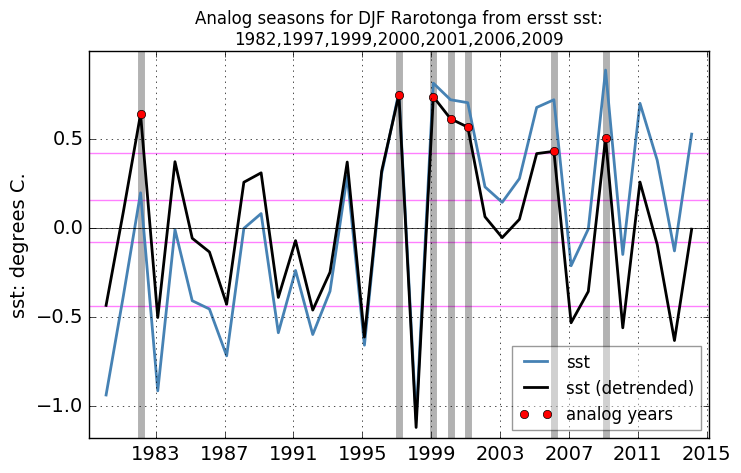

In [19]:
f = p.plot_season_ts()

In [20]:
a = Analogs(p, 'ncep', 'hgt_1000')

In [21]:
a


        ------------------
        Analog composite for a proxy, with dataset ncep and variable hgt_1000
        ------------------
        

In [22]:
hgt_1000 = a.composite()

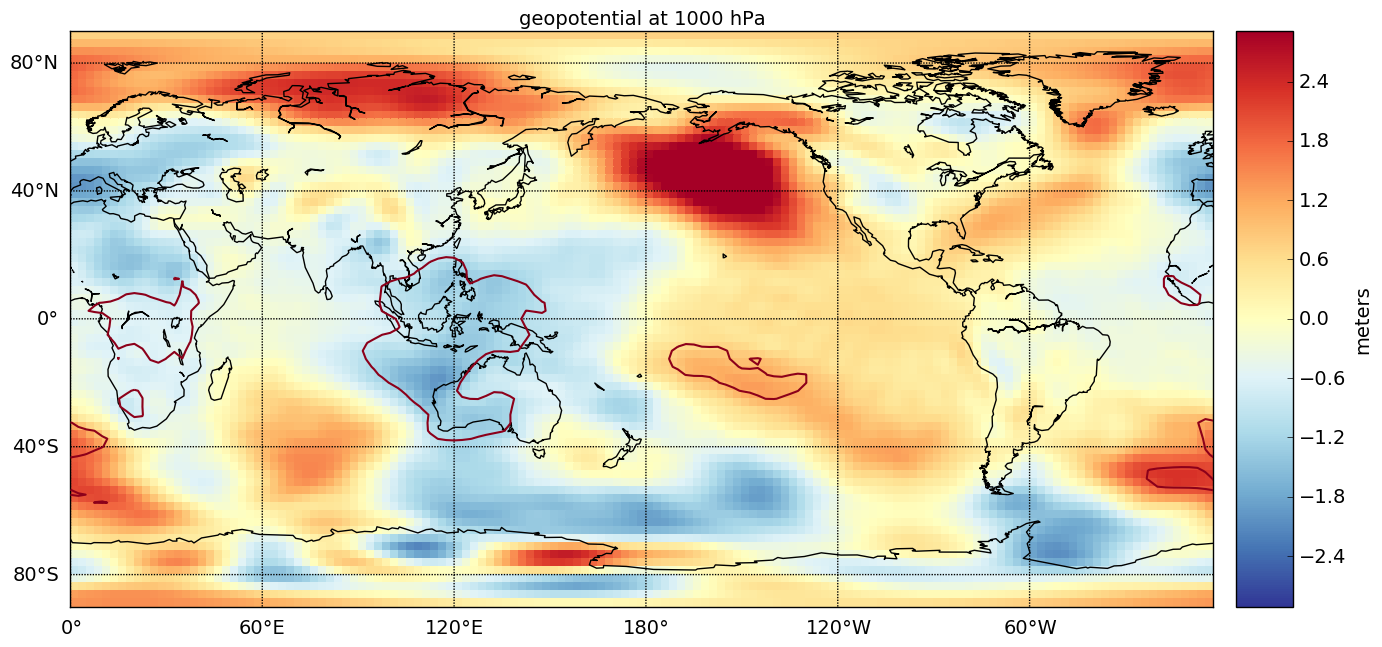

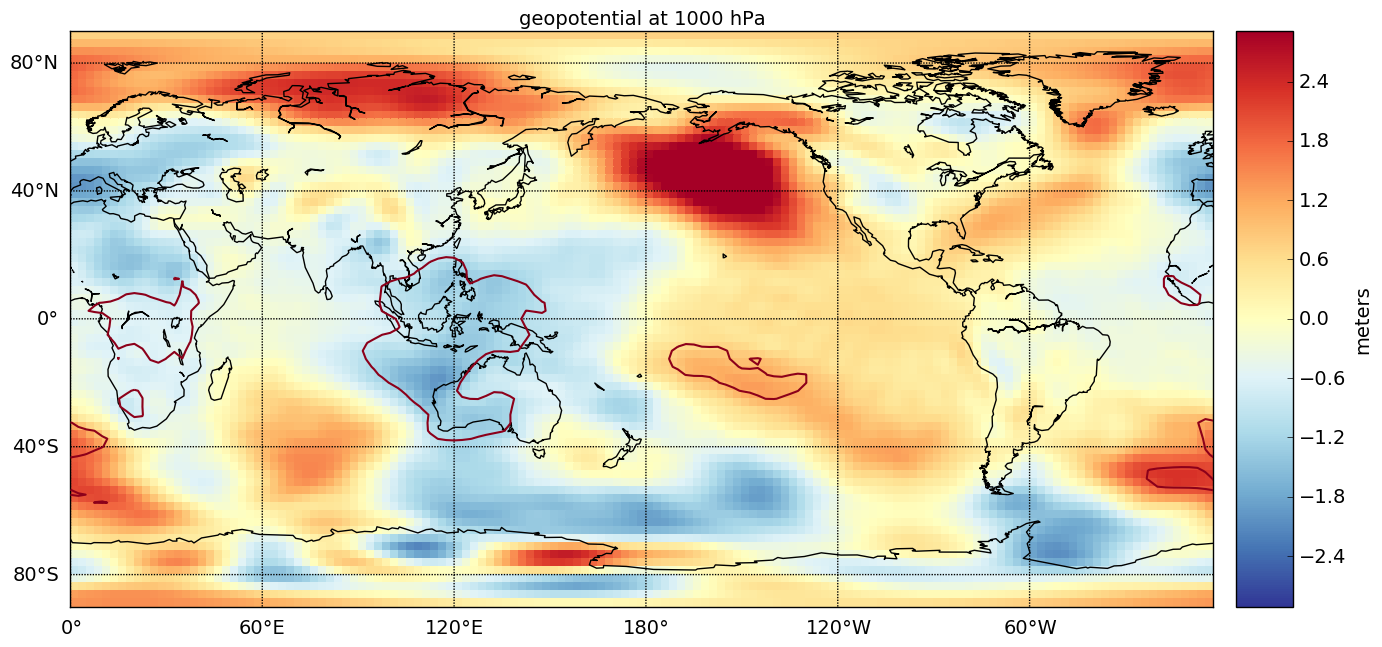

In [23]:
scalar_plot(hgt_1000,test=0.05).plot()

### example with a ensemble of consistent proxies 

In [24]:
ens = Ensemble(djsons=djsons, pjsons=pjsons)


            seasons and method [`detrend` or not] are consistent among proxies,
            the composite anomalies for each proxy can be calculated
            for the ensemble as a whole using the extended list of analog years
            


In [25]:
len(ens.df_proxies)

25

In [26]:
b = Analogs(ens, 'ncep', 'hgt_1000').composite()

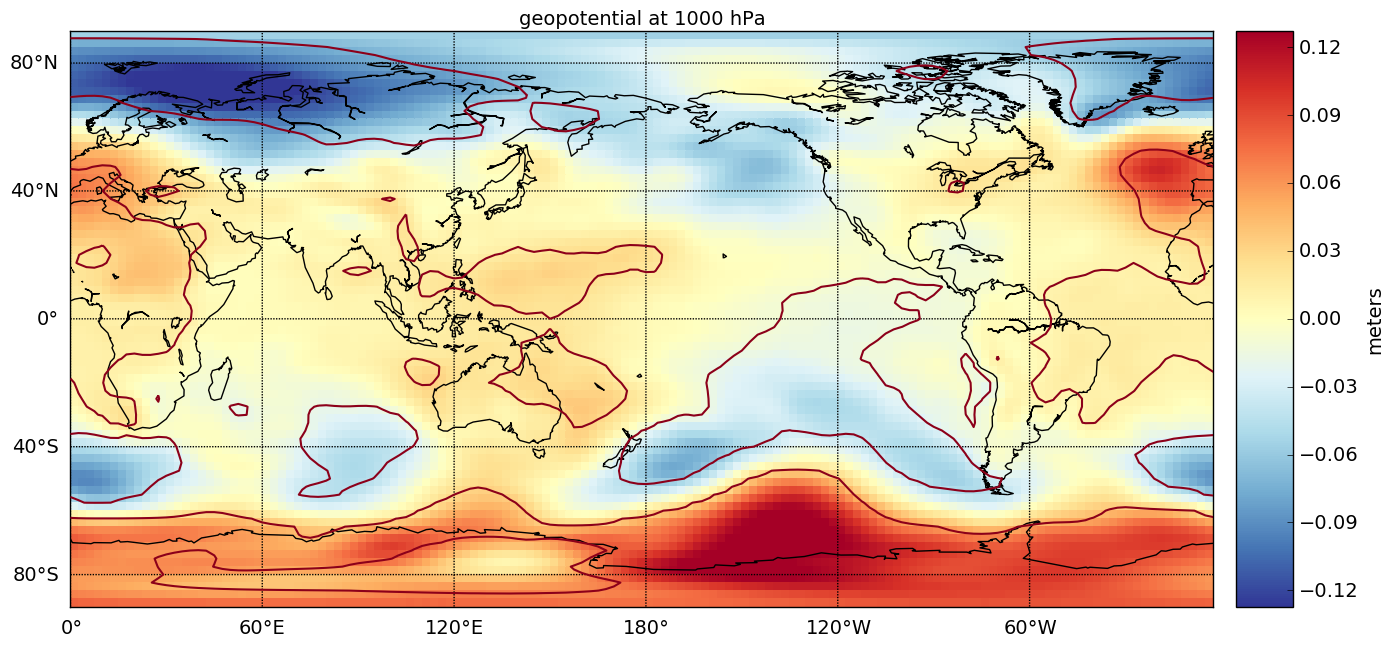

In [27]:
f = scalar_plot(b,test=0.05).plot()

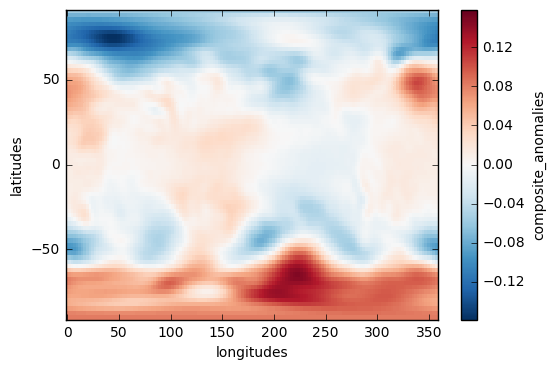

In [28]:
b.dset_compos['composite_anomalies'].plot()

In [29]:
len(ens.df_proxies)

25

In [30]:
len(ens.analog_years)

25

In [31]:
ens.df_proxies.head()

,analog_years,aspect,calc_anoms,calendar,category,chronology,climatology,coords,dataset,dating_convention,...,extracted_coords,measurement,period,proxy_type,season,sitename,trend_params,value,variable,weights
Amedee,"[1983, 1987, 1997, 2001, 2003, 2013, 2014]",None,True,gregorian,B,historic,"[1981, 2010]","[166.47, -22.48]",ersst,absolute,...,"[166.0, -22.0]",delta O18,"[1979, 2014]",None,DJF,Amedee,"{'intercept': -16.257205985829472, 'slope': 0....",-0.26,sst,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Avoca,"[1983, 1984, 1993, 2003, 2004, 2005, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[171.405812, -43.043031]",ncep,NaN,...,"[172.5, -42.5]",NaN,"[1979, 2014]",NaN,DJF,Avoca,"{'intercept': 56.434411504533585, 'slope': -0....",-0.53,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Browning Creek,"[1983, 1984, 1992, 1993, 2002, 2003, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[169.836463, -43.850548]",ncep,NaN,...,"[170.0, -45.0]",NaN,"[1979, 2014]",NaN,DJF,Browning Creek,"{'intercept': 25.983608025284596, 'slope': -0....",-0.62,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Cameron,"[1983, 1984, 1993, 2003, 2004, 2005, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[171.505139, -42.934067]",ncep,NaN,...,"[172.5, -42.5]",NaN,"[1979, 2014]",NaN,DJF,Cameron,"{'intercept': 56.434411504533585, 'slope': -0....",-0.81,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
Caples,"[1983, 1984, 1992, 1993, 2001, 2004, 2007]",NaN,False,NaN,WB,NaN,"[1981, 2010]","[168.182845, -44.801851]",ncep,NaN,...,"[167.5, -45.0]",NaN,"[1979, 2014]",NaN,DJF,Caples,"{'intercept': 17.33270763616267, 'slope': -0.0...",-0.35,Tmean,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"


### test now with an INCONSISTENT ensemble 

In [32]:
ens = Ensemble(djsons=djsons, pjsons='../../jsons/proxies/inconsistents/')


            seasons and method [`detrend` or not] are inconsistent among proxies,
            the composite anomalies for EACH proxy can only be calculated
            INDEPENDENTLY, THEN combined ...
            


In [35]:
ens.df_proxies.to_csv('/Users/nicolasf/Desktop/example_table_proxies.csv')

In [34]:
ens.detrend

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [ ]:
ens.climatology

In [ ]:
c = Analogs(ens, 'ncep', 'hgt_1000')

In [ ]:
c

In [ ]:
c.parent.description

In [ ]:
c.composite()

In [ ]:
c.dset_compos

In [ ]:
from sys import getsizeof

In [ ]:
getsizeof(c.dset_compos)

In [ ]:
c.dset_compos

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
c.dset_compos['composite_anomalies'].plot(x='longitudes', y='latitudes', col='proxy', col_wrap=5)
f = plt.gcf()
f.savefig('/Users/nicolasf/Desktop/dummy_ensemble_plot.png', dpi=200)

In [ ]:
ave_proxies = c.dset_compos[['composite_anomalies']].mean('proxy')

In [ ]:
ave_proxies['composite_anomalies'].plot()

In [ ]:
mat = c.dset_compos['pvalues'].data

In [ ]:
a = np.array([False, True, True])

In [ ]:
np.alltrue(a).astype(int)

In [ ]:
def test_pvalues_ensemble(x, test=0.1, method='all'):
    if method == 'all': 
        ptest = np.all(x <= test).astype(int)
    elif method == 'any':
        ptest = np.any(x <= test).astype(int) 
    else:
        try: 
            percent = float(method) / 100.
            ptest = ((x.sum() / len(x)) >= percent).astype(int)
        except: 
            print("cannot coerce method to be a float (percentage)")
    return ptest

In [ ]:
ptest = np.apply_along_axis(test_values, 0, mat, **{'test':0.1, 'method':50})

In [ ]:
plt.imshow(ptest)